In [1]:
import pandas as pd
import numpy as np
import altair as alt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from itertools import chain


datpath = "https://raw.githubusercontent.com/pokepokepokedex/Pokedex/master/Pokemon.csv"

def cleansk(datf: pd.DataFrame) -> pd.DataFrame: 
    return (datf.fillna('') # note: type 2 is the only one with any nulls at all
                .assign(Legendary = [1 if x else 0 for x in datf.Legendary], 
                      Type = [f"{x}_{y}" for x,y in zip(datf['Type 1'], datf['Type 2'])])
                .drop(['Type 1', 'Type 2'], axis=1))

df = pd.read_csv(datpath).pipe(cleansk)

t=df.shape
print(f"shape: {t}")
print(f"ratio: {np.divide(t[0], t[1]):.5}")

df.head()

shape: (800, 12)
ratio: 66.667


,#,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Type
0,1,Bulbasaur,318,45,49,49,65,65,45,1,0,Grass_Poison
1,2,Ivysaur,405,60,62,63,80,80,60,1,0,Grass_Poison
2,3,Venusaur,525,80,82,83,100,100,80,1,0,Grass_Poison
3,3,VenusaurMega Venusaur,625,80,100,123,122,120,80,1,0,Grass_Poison
4,4,Charmander,309,39,52,43,60,50,65,1,0,Fire_nan


In [2]:
X = df.drop(['Generation', '#', 'Name', 'Type'], axis=1)
y = df.Generation

X_train, X_test, y_train, y_test = train_test_split(X, y)

model = LogisticRegression(multi_class='auto', solver='lbfgs', max_iter=10**4).fit(X_train, y_train)

model.score(X_test, y_test)

0.235

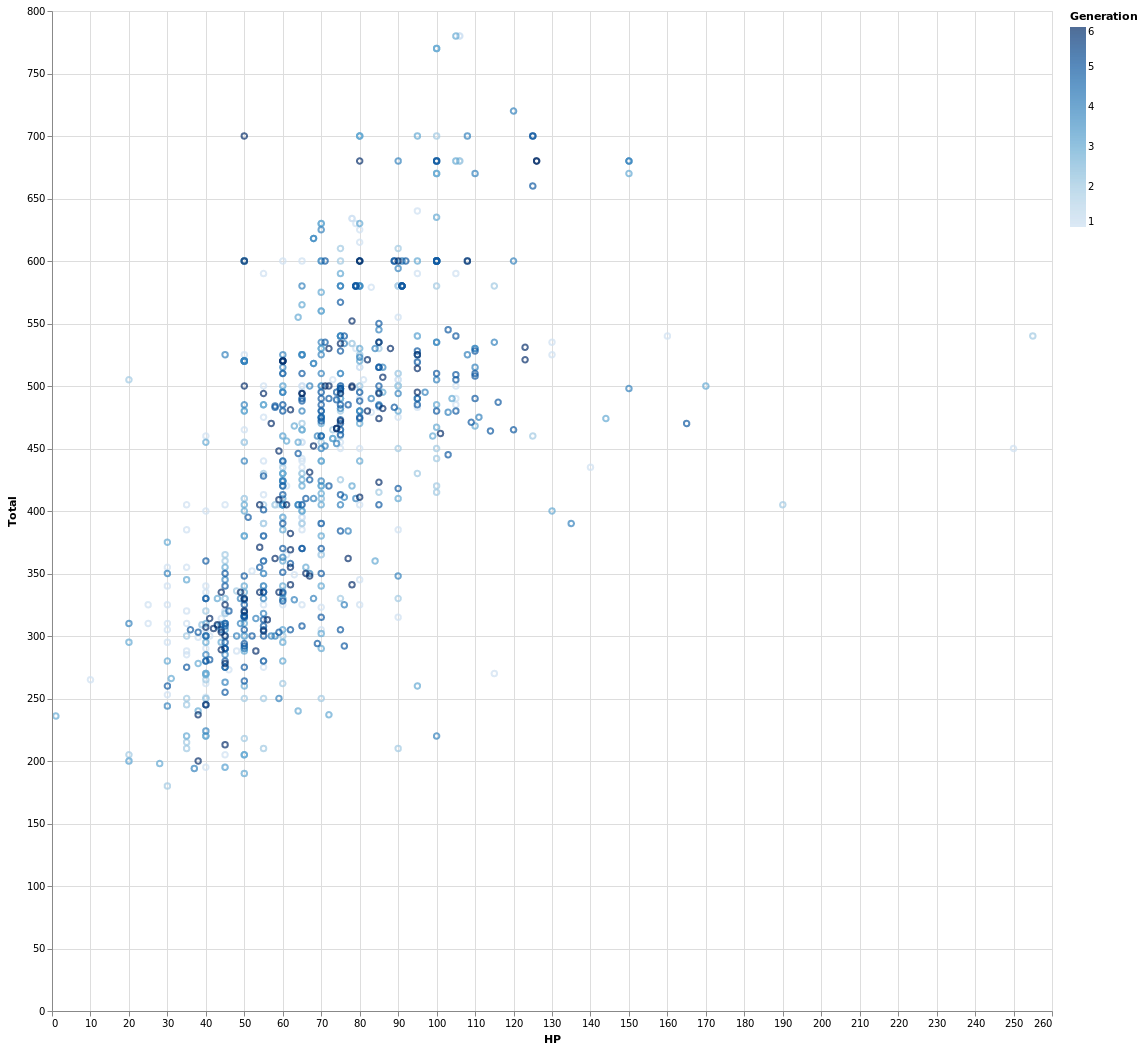

In [32]:
alt.Chart(df, width=1000, height=1000).mark_point().encode(x='HP', 
                                                           y='Total', 
                                                           color='Generation')

In [12]:
types = set(chain.from_iterable(pd.read_csv(datpath)[['Type 1', 'Type 2']].values)) - {np.nan}

ordering = pd.DataFrame(np.ones((len(types), len(types))), columns=types, index=types)

#np.testing.assert_almost_equal(ordering.values, -1 * ordering.T.values)

ordering.Normal.Ghost = 0
ordering.Normal[['Rock', 'Steel']] = 0.5
ordering.Fire[['Fire', 'Water', 'Rock', 'Dragon']] = 0.5
ordering.Fire[['Grass', 'Ice', 'Bug', 'Steel']] = 2
ordering.Water[['Water', 'Grass', 'Dragon']] = 0.5
ordering.Water[['Fire', 'Ground', 'Rock']] = 2
## ... only 14 more! 

ordering.Ghost.Normal = 0
ordering.Ghost.Fighting = 2

ordering

,Steel,Fire,Grass,Flying,Psychic,Ghost,Dark,Poison,Dragon,Bug,Fighting,Rock,Ice,Water,Electric,Ground,Fairy,Normal
Steel,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
Fire,1.0,0.5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0
Grass,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0,1.0,1.0,1.0
Flying,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Psychic,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Ghost,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
Dark,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Poison,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Dragon,1.0,0.5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0,1.0,1.0,1.0
Bug,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [3]:
datpath = "https://raw.githubusercontent.com/pokepokepokedex/Pokedex/master/Pokemon.csv"

def clean_lite_6(datf: pd.DataFrame) -> pd.DataFrame: 
    return (datf.fillna('') # note: type 2 is the only one with any nulls at all
                .assign(Legendary = [1 if x else 0 for x in datf.Legendary]))

df6 = pd.read_csv(datpath).pipe(clean_lite_6)
            
df6.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,0
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,0
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,0
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,0
4,4,Charmander,Fire,,309,39,52,43,60,50,65,1,0


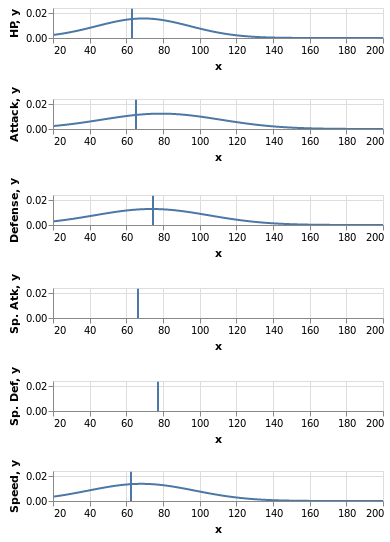

In [68]:
from scipy.stats import norm
from typing import Optional
from functools import reduce
Vcat = lambda R,S: R & S
Ocat = lambda C,D: C + D

class PokeDescribe: 
    def __init__(self, datf: pd.DataFrame): 
        self.HEIGHT = 30
        self.WIDTH = 330
        self.xlim = (20, 200)
        self.stats = ['HP', 'Attack', 'Defense', 
                      'Sp. Atk', 'Sp. Def', 'Speed']
        self.df = datf
        self.x = np.linspace(self.xlim[0], self.xlim[1], 1000)
        self.gaussians = {name: norm(loc=self.df[name].mean(), 
                                     scale=self.df[name].std()) 
                          for name in self.stats}
        self.bells = pd.DataFrame({**{'x': self.x}, 
                                   **{name: self.gaussians[name].pdf(self.x) 
                                      for name in self.stats}})
        self.C = alt.Chart(self.bells, 
                           height=self.HEIGHT, 
                           width=self.WIDTH
                          ).mark_line().encode(
            x='x')
        self.charts = {name: self.C.encode(y=name) for name in self.stats}
        self.BellCurves = reduce(Vcat, [self.charts[name] for name in self.stats])

class PokeDescribeNAME(PokeDescribe): 
    def __init__(self, datf: pd.DataFrame, Name: str): 
        super().__init__(datf)
        self.PSI = 50
        self.name = Name
        self.y_max = 1.5 * max([max(ls) for ls in [self.gaussians[st].pdf(self.x) for st in self.stats]])
        self.y = pd.DataFrame({'y': np.linspace(0, self.y_max, self.PSI)})
        self.D = alt.Chart(self.y).mark_line().encode(y='y')
        self.means = {st: self.df[self.df.Name==self.name][st].mean() for st in self.stats}
        self.Dcharts = {st: self.D.encode(x=alt.value(self.means[st]))
                        for st in self.stats}
        self.SHOW = reduce(Vcat, [self.charts[st] + self.Dcharts[st] for st in self.stats])

blastoise = PokeDescribeNAME(df6, "Blastoise")

['Sp. Atk', 'Sp. Def']
blastoise.SHOW

In [4]:
#norm(loc=df.HP.mean(), scale=df.HP.std()).pdf(np.linspace(-500,500,1000))

"None" is not None

df6.columns[5:11]

Index(['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed'], dtype='object')

In [21]:
norm(loc=44, scale=1).pdf(44)

0.3989422804014327

In [30]:
k = {'x': 4}
l = {'c': 5}

{**k, **l}

{'x': 4, 'c': 5}

In [66]:
from seaborn import pairplot

#pairplot(df[df.columns[5:11]]); 

df['#'].max(), df.shape[0]

(721, 800)

In [114]:

def clean_lite_6(datf: pd.DataFrame) -> pd.DataFrame: 
    return (datf.fillna('')
            .assign(Legendary = [1 if x else 0 for x in datf.Legendary],
                    Sp_Attack = datf['Sp. Atk'], 
                    Sp_Defense = datf['Sp. Def'],
                    Type1 = datf['Type 1'], 
                    Type2 = datf['Type 2'])
            .drop(['Sp. Atk', 'Sp. Def', 'Type 1', 'Type 2'], axis=1)
            .rename(lambda s: s.lower() + '_g6', axis='columns')
           )

df6 = pd.read_csv('Pokemon.csv').pipe(clean_lite_6)#.rename(str.lower, axis='columns').rename(str.replace(" ", "_"), axis="columns"))

df7 = pd.read_csv('pokemon_w7.csv')

df = df7.merge(df6, how='outer', left_on='name', right_on='name'+'_g6')

In [115]:
df.columns

Index(['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack',
       'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'classfication', 'defense', 'experience_growth', 'height_m', 'hp',
       'japanese_name', 'name', 'percentage_male', 'pokedex_number',
       'sp_attack', 'sp_defense', 'speed', 'type1', 'type2', 'weight_kg',
       'generation', 'is_legendary', '#_g6', 'name_g6', 'total_g6', 'hp_g6',
       'attack_g6', 'defense_g6', 'speed_g6', 'generation_g6', 'legendary_g6',
       'sp_attack_g6', 'sp_defense_g6', 'type1_g6', 'type2_g6'],
      dtype='object')

'hello_world'

49

In [109]:

two_stats = ['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed']


Index(['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack',
       'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'classfication', 'defense', 'experience_growth', 'height_m', 'hp',
       'japanese_name', 'name', 'percentage_male', 'pokedex_number',
       'sp_attack', 'sp_defense', 'speed', 'type1', 'type2', 'weight_kg',
       'generation', 'is_legendary'],
      dtype='object')

In [157]:
def f(xs, ys): 
    #assert len(xs)==len(ys)
    if xs==[] and ys==[]: 
        return []
    else: 
        return [xs[0], ys[0]] + f(xs[1:], ys[1:])

#f(df.columns[5:11], two_stats)
        
#df2.merge(df, how='outer', left_on='name', right_on='Name')[two_stats + list(df.columns[5:11]) + ['name', 'Name', 'generation', 'Generation']]

# df[df.columns[5:11]].to_numpy() == df2[two_stats].to_numpy()

# for t in zip(two_stats, df.columns[5:11]):
#     X = [x==y for x,y in zip(df2[t[0]], df[t[1]])]
#     print(sum(X))

#([x==y for x,y in zip(df2[two_stats].values, df.columns[5:11].values)])

#list(zip(df2[two_stats].values, df[df.columns[5:11]].values))

[list(t) for t in zip([1,2], [3,4])]

[[1, 3], [2, 4]]

In [90]:
df2.name

0       Bulbasaur
1         Ivysaur
2        Venusaur
3      Charmander
4      Charmeleon
5       Charizard
6        Squirtle
7       Wartortle
8       Blastoise
9        Caterpie
10        Metapod
11     Butterfree
12         Weedle
13         Kakuna
14       Beedrill
15         Pidgey
16      Pidgeotto
17        Pidgeot
18        Rattata
19       Raticate
20        Spearow
21         Fearow
22          Ekans
23          Arbok
24        Pikachu
25         Raichu
26      Sandshrew
27      Sandslash
28       Nidoran♀
29       Nidorina
          ...    
771    Type: Null
772      Silvally
773        Minior
774        Komala
775    Turtonator
776    Togedemaru
777       Mimikyu
778       Bruxish
779        Drampa
780      Dhelmise
781      Jangmo-o
782      Hakamo-o
783       Kommo-o
784     Tapu Koko
785     Tapu Lele
786     Tapu Bulu
787     Tapu Fini
788        Cosmog
789       Cosmoem
790      Solgaleo
791        Lunala
792      Nihilego
793      Buzzwole
794     Pheromosa
795     Xu

In [175]:
#df['#'], df2.pokedex_number

D = df2.merge(df, how='outer', left_on='name', right_on='Name')[['Name', 'name','#', 'pokedex_number', 'generation']]

D[D.name.str.contains('Type').fillna(False).values]


,Name,name,#,pokedex_number,generation
771,NaN,Type: Null,NaN,772.0,7.0
